In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as sp
import pylab
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv('Desktop/diemthi2021.csv', encoding = 'UTF-8')
df2 = pd.read_excel('Desktop/danh muc quan huyen.xlsx')
df1
df2

,Unnamed: 0,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960897,960897,23009414,9.0,7.25,8.75,7.75,NaN,NaN,6.75,NaN,7.2,NaN,NaN,NaN,NaN,NaN
960898,960898,28031791,8.4,6.50,7.75,5.75,NaN,NaN,8.25,NaN,7.4,NaN,NaN,NaN,NaN,NaN
960899,960899,28033022,4.2,NaN,NaN,NaN,6.00,5.75,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960900,960900,60003881,9.0,8.75,7.50,6.00,NaN,NaN,6.50,NaN,7.2,NaN,NaN,NaN,NaN,NaN


,"DANH MỤC TỈNH, HUYỆN NĂM 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,STT,Ma_Tinh/TP,Tinh/TP,Ma_Quan/Huyen,Quan_Huyen
1,1,1,Hà Nội,0,Sở Giáo dục và Đào tạo
2,2,1,Hà Nội,1,Quận Ba Đình
3,3,1,Hà Nội,2,Quận Hoàn Kiếm
4,4,1,Hà Nội,3,Quận Hai Bà Trưng
...,...,...,...,...,...
785,785,64,Hậu Giang,7,Thị xã Ngã Bảy
786,786,64,Hậu Giang,8,Thị xã Long Mỹ
787,787,65,Cục nhà trường,0,Sở Giáo dục và Đào tạo
788,788,65,Cục nhà trường,2,Cục Nhà trường - Đồng Nai


In [3]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960902 entries, 0 to 960901
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       960902 non-null  int64  
 1   id_examinee      960902 non-null  int64  
 2   math             950710 non-null  float64
 3   physics          333302 non-null  float64
 4   chemistry        334902 non-null  float64
 5   biology          329550 non-null  float64
 6   history          619880 non-null  float64
 7   geography        614237 non-null  float64
 8   literature       947914 non-null  float64
 9   civic_education  518859 non-null  float64
 10  english          838951 non-null  float64
 11  russian          103 non-null     float64
 12  french           795 non-null     float64
 13  chinese          2157 non-null    float64
 14  german           109 non-null     float64
 15  japanese         1007 non-null    float64
dtypes: float64(14), int64(2)
memory usage:

In [4]:
# df1
# 1. Xóa cột Unamed
# 2. Sort SBD
df1.rename({'Unnamed: 0':'a'}, axis=1, inplace=True)
df1.drop(['a'], axis=1, inplace=True)
df1.sort_values(by='id_examinee', inplace=True)
df1.reset_index(drop=True, inplace=True)
df1

# df2
# 1. Set header
# 2. Xóa cột STT, Ma_Quan/Huyen, Quan/Huyen
# 3. Xóa duplicate
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2.drop(['STT','Ma_Quan/Huyen','Quan_Huyen'], axis=1, inplace=True)
df2.drop_duplicates(['Ma_Tinh/TP'],inplace=True)
df2.reset_index(drop=True, inplace=True)
df2

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960897,64006834,8.6,8.25,7.00,6.50,NaN,NaN,8.25,NaN,6.2,NaN,NaN,NaN,NaN,NaN
960898,64006835,9.0,8.00,8.25,5.50,NaN,NaN,7.50,NaN,9.4,NaN,NaN,NaN,NaN,NaN
960899,64006836,4.8,NaN,NaN,NaN,3.75,7.00,7.00,9.00,4.6,NaN,NaN,NaN,NaN,NaN
960900,64006837,7.4,NaN,NaN,NaN,4.50,6.75,7.75,9.25,9.4,NaN,NaN,NaN,NaN,NaN


C:\Users\PC\AppData\Local\Temp\ipykernel_11144\172695363.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['STT','Ma_Quan/Huyen','Quan_Huyen'], axis=1, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_11144\172695363.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(['Ma_Tinh/TP'],inplace=True)


,Ma_Tinh/TP,Tinh/TP
0,1,Hà Nội
1,2,Tp. Hồ Chí Minh
2,3,Hải Phòng
3,4,Đà Nẵng
4,5,Hà Giang
...,...,...
59,61,Cà Mau
60,62,Điện Biên
61,63,Đăk Nông
62,64,Hậu Giang


In [5]:
df2.nunique()

0
Ma_Tinh/TP    64
Tinh/TP       64
dtype: int64

In [6]:
# Tách Mã tỉnh - SBD
Ma_Tinh_TP = []
cache = df1['id_examinee'].tolist()
for i in cache:
    j = i // 1000000
    Ma_Tinh_TP.append(j)
df1['Ma_Tinh/TP'] = Ma_Tinh_TP
df1

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese,Ma_Tinh/TP
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN,1
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN,1
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960897,64006834,8.6,8.25,7.00,6.50,NaN,NaN,8.25,NaN,6.2,NaN,NaN,NaN,NaN,NaN,64
960898,64006835,9.0,8.00,8.25,5.50,NaN,NaN,7.50,NaN,9.4,NaN,NaN,NaN,NaN,NaN,64
960899,64006836,4.8,NaN,NaN,NaN,3.75,7.00,7.00,9.00,4.6,NaN,NaN,NaN,NaN,NaN,64
960900,64006837,7.4,NaN,NaN,NaN,4.50,6.75,7.75,9.25,9.4,NaN,NaN,NaN,NaN,NaN,64


In [7]:
# Merge 2 dataframes
df = pd.merge(df1, df2, how='inner', on='Ma_Tinh/TP')
df.dropna(subset=['math','literature'], inplace=True)
df['math_lite'] = df['math'] + df['literature']
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937895 entries, 0 to 960901
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_examinee      937895 non-null  int64  
 1   math             937895 non-null  float64
 2   physics          324022 non-null  float64
 3   chemistry        323948 non-null  float64
 4   biology          323856 non-null  float64
 5   history          609878 non-null  float64
 6   geography        604328 non-null  float64
 7   literature       937895 non-null  float64
 8   civic_education  518315 non-null  float64
 9   english          835701 non-null  float64
 10  russian          103 non-null     float64
 11  french           791 non-null     float64
 12  chinese          2152 non-null    float64
 13  german           107 non-null     float64
 14  japanese         1006 non-null    float64
 15  Ma_Tinh/TP       937895 non-null  object 
 16  Tinh/TP          937895 non-null  obje

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese,Ma_Tinh/TP,Tinh/TP,math_lite
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,17.45
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,10.65
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,15.15
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,17.05
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,16.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960897,64006834,8.6,8.25,7.00,6.50,NaN,NaN,8.25,NaN,6.2,NaN,NaN,NaN,NaN,NaN,64,Hậu Giang,16.85
960898,64006835,9.0,8.00,8.25,5.50,NaN,NaN,7.50,NaN,9.4,NaN,NaN,NaN,NaN,NaN,64,Hậu Giang,16.50
960899,64006836,4.8,NaN,NaN,NaN,3.75,7.00,7.00,9.00,4.6,NaN,NaN,NaN,NaN,NaN,64,Hậu Giang,11.80
960900,64006837,7.4,NaN,NaN,NaN,4.50,6.75,7.75,9.25,9.4,NaN,NaN,NaN,NaN,NaN,64,Hậu Giang,15.15


Học sinh ở địa phương kém phát triển được cộng điểm thi THPT Quốc gia là phù hợp? (+1.25đ) (Mức ý nghĩa 5%)
1. H0: Học sinh nông thôn có điều kiện học tập kém được +1.25đ sẽ ngang bằng với học sinh thành thị có điều kiện học tập tốt.
                 μ1 = μ2' (μ2' = μ2 + 1.25)  
2. H1: Điểm thi của học sinh thành thị sẽ thấp hơn điểm thi của học sinh nông thôn được + 1đ.
                 μ1 < μ2'

In [8]:
print(df2['Tinh/TP'].tolist())

['Hà Nội', 'Tp. Hồ Chí Minh', 'Hải Phòng', 'Đà Nẵng', 'Hà Giang', 'Cao Bằng', 'Lai Châu', 'Lào Cai', 'Tuyên Quang', 'Lạng Sơn', 'Bắc Kạn', 'Thái Nguyên', 'Yên Bái', 'Sơn La', 'Phú Thọ', 'Vĩnh Phúc', 'Quảng Ninh', 'Bắc Giang', 'Bắc Ninh', 'Hải Dương', 'Hưng Yên', 'Hoà Bình', 'Hà Nam', 'Nam Định', 'Thái Bình', 'Ninh Bình', 'Thanh Hoá', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên -Huế', 'Quảng Nam', 'Quảng Ngãi', 'Kon Tum', 'Bình Định', 'Gia Lai', 'Phú Yên', 'Đắk Lắk', 'Khánh Hoà', 'Lâm Đồng', 'Bình Phước', 'Bình Dương', 'Ninh Thuận', 'Tây Ninh', 'Bình Thuận', 'Đồng Nai', 'Long An', 'Đồng Tháp', 'An Giang', 'Bà Rịa-Vũng Tàu', 'Tiền Giang', 'Kiên Giang', 'Cần Thơ', 'Bến Tre', 'Vĩnh Long', 'Trà Vinh', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau', 'Điện Biên', 'Đăk Nông', 'Hậu Giang', 'Cục nhà trường']


Dataset sẽ được chia thành 2 phần
1. Điểm thi của những thí sinh ở Hà Nội và Tp. Hồ Chí Minh (n1), lấy ngẫu nhiên 10000 giá trị
2. Điểm thi của những thí sinh ở Hà Giang, Quảng Nam, Kon Tum và Sóc Trăng (n2), lấy ngẫu nhiên 10000 giá trị

In [9]:
df_n1 = df.apply(lambda row: row[df['Tinh/TP'].isin(['Hà Nội', 'Tp. Hồ Chí Minh'])])
df_n1
df_n1.info()

df_n2 = df.apply(lambda row: row[df['Tinh/TP'].isin(['Hà Giang', 'Kon Tum', 'Quảng Nam', 'Sóc Trăng'])])
df_n2
df_n2['Tinh/TP'].unique()
df_n2.info()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese,Ma_Tinh/TP,Tinh/TP,math_lite
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,17.45
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,10.65
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,15.15
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,17.05
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN,1,Hà Nội,16.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186944,2089271,6.2,6.25,6.50,6.75,NaN,NaN,5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Tp. Hồ Chí Minh,11.45
186945,2089272,4.6,NaN,NaN,NaN,6.50,6.75,3.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Tp. Hồ Chí Minh,8.35
186946,2089273,7.8,NaN,NaN,NaN,7.25,8.00,6.75,9.00,9.6,NaN,NaN,NaN,NaN,NaN,2,Tp. Hồ Chí Minh,14.55
186947,2089274,6.4,4.50,7.75,4.50,NaN,NaN,5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Tp. Hồ Chí Minh,11.65


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183386 entries, 0 to 186948
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_examinee      183386 non-null  int64  
 1   math             183386 non-null  float64
 2   physics          80179 non-null   float64
 3   chemistry        80164 non-null   float64
 4   biology          80135 non-null   float64
 5   history          102142 non-null  float64
 6   geography        101258 non-null  float64
 7   literature       183386 non-null  float64
 8   civic_education  85213 non-null   float64
 9   english          160617 non-null  float64
 10  russian          7 non-null       float64
 11  french           329 non-null     float64
 12  chinese          601 non-null     float64
 13  german           88 non-null      float64
 14  japanese         476 non-null     float64
 15  Ma_Tinh/TP       183386 non-null  object 
 16  Tinh/TP          183386 non-null  obje

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese,Ma_Tinh/TP,Tinh/TP,math_lite
223075,5000001,7.4,NaN,NaN,NaN,4.75,6.50,4.00,8.25,3.8,NaN,NaN,NaN,NaN,NaN,5,Hà Giang,11.40
223076,5000002,7.0,NaN,NaN,NaN,3.25,6.25,5.50,7.50,7.0,NaN,NaN,NaN,NaN,NaN,5,Hà Giang,12.50
223077,5000003,7.0,NaN,NaN,NaN,3.25,6.00,6.50,6.00,6.6,NaN,NaN,NaN,NaN,NaN,5,Hà Giang,13.50
223078,5000004,8.2,7.25,8.50,5.75,NaN,NaN,7.00,NaN,5.6,NaN,NaN,NaN,NaN,NaN,5,Hà Giang,15.20
223079,5000005,5.8,NaN,NaN,NaN,2.75,6.75,7.00,7.50,8.2,NaN,NaN,NaN,NaN,NaN,5,Hà Giang,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923889,59009636,7.0,3.75,3.25,4.75,NaN,NaN,7.00,NaN,4.6,NaN,NaN,NaN,NaN,NaN,59,Sóc Trăng,14.00
923890,59009637,4.2,NaN,NaN,NaN,3.25,6.25,5.25,7.25,4.4,NaN,NaN,NaN,NaN,NaN,59,Sóc Trăng,9.45
923891,59009638,5.4,NaN,NaN,NaN,2.50,5.25,6.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,Sóc Trăng,12.15
923892,59009639,6.2,NaN,NaN,NaN,5.25,7.00,8.00,9.25,5.0,NaN,NaN,NaN,NaN,NaN,59,Sóc Trăng,14.20


array(['Hà Giang', 'Quảng Nam', 'Kon Tum', 'Sóc Trăng'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35498 entries, 223075 to 923893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_examinee      35498 non-null  int64  
 1   math             35498 non-null  float64
 2   physics          10779 non-null  float64
 3   chemistry        10776 non-null  float64
 4   biology          10775 non-null  float64
 5   history          24630 non-null  float64
 6   geography        24378 non-null  float64
 7   literature       35498 non-null  float64
 8   civic_education  22989 non-null  float64
 9   english          33729 non-null  float64
 10  russian          0 non-null      float64
 11  french           0 non-null      float64
 12  chinese          63 non-null     float64
 13  german           0 non-null      float64
 14  japanese         6 non-null      float64
 15  Ma_Tinh/TP       35498 non-null  object 
 16  Tinh/TP          35498 non-null  object 
 17  math_l

MATHEMATICS-LITERATURE

In [10]:
# Nhóm 1
n1 = df_n1['math_lite'].sample(10000)
n1.describe()

count    10000.000000
mean        13.645438
std          2.393362
min          3.250000
25%         12.400000
50%         14.050000
75%         15.312500
max         19.100000
Name: math_lite, dtype: float64

In [11]:
# Nhóm 2
n2 = df_n2['math_lite'].sample(10000)
n2_new = (df_n2['math_lite'] + 1.25).sample(10000)
n2.describe()
n2_new.describe()

count    10000.000000
mean        12.326905
std          2.795085
min          2.400000
25%         10.600000
50%         12.700000
75%         14.450000
max         18.900000
Name: math_lite, dtype: float64

count    10000.000000
mean        13.584790
std          2.750768
min          3.900000
25%         11.850000
50%         13.950000
75%         15.650000
max         20.000000
Name: math_lite, dtype: float64

<Axes: >

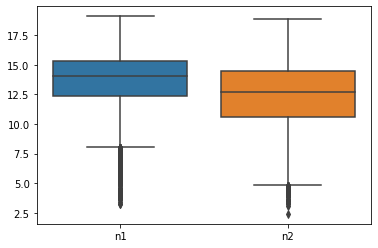

<Axes: >

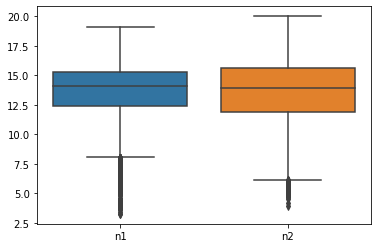

In [12]:
score = {'n1': list(n1), 'n2': list(n2)}
df_score = pd.DataFrame(score)
sns.boxplot(data=df_score)
plt.show()

score_new = {'n1': list(n1), 'n2': list(n2_new)}
df_score_new = pd.DataFrame(score_new)
sns.boxplot(data=df_score_new)
plt.show()

In [13]:
print(np.var(n1), np.var(n2), np.var(n2_new))

5.727609788155999 7.811721290975 7.5659693159


In [14]:
stat, p = stats.levene(n1, n2)
stat, p
stat, p = stats.levene(n1, n2_new)
stat, p

(330.8052566531212, 2.5039117550847166e-73)

(291.84081035442273, 5.709105435560491e-65)

In [15]:
stats.ttest_ind(n1, n2, equal_var=False)
stats.ttest_ind(n1, n2_new, equal_var=False)

Ttest_indResult(statistic=35.831969831165985, pvalue=2.180962994587104e-272)

Ttest_indResult(statistic=1.6633123254041011, pvalue=0.09626590192396553)